In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 3D Ising model
def ising3D(J, h, T, N, M, n):
    """
    input:
        J: interaction energy
        h: external magnetic field
        T: temperature
        N: size of the spin lattice
        M: number of Monte Carlo steps
        n: number of samples to calculate average
    output:
        E_avg: average energy at temperature T
        M_avg: average magnetization at temperature T
        C: specific heat at temperature T
        X: susceptibility initialize at temperature T
    """
    # initialize
    spins = np.random.choice([-1, 1], size=(N, N, N))  # random spin initialization
    # spins = np.ones((N, N, N))                         # all spin up initialization

    # periodic boundary condition
    # E = interaction energy with up/down/left/right/forward/backward neighbors + external field energy
    up = np.roll(spins, 1, axis=0)
    down = np.roll(spins, -1, axis=0)
    left = np.roll(spins, 1, axis=1)
    right = np.roll(spins, -1, axis=1)
    forward = np.roll(spins, 1, axis=2)
    backward = np.roll(spins, -1, axis=2)
    E = -J*(np.sum(spins*up) + np.sum(spins*down) + np.sum(spins*left) + np.sum(spins*right) + np.sum(spins*forward) + np.sum(spins*backward)) - h*np.sum(spins)

    E_list = np.zeros(M)  # list of energy after per N**3 Monte Carlo step
    M_list = np.zeros(M)  # list of magnetization after per N**3 Monte Carlo step

    # Metropolis algorithm
    for i in range(M):
        for j in range(N**3):
            # randomly choose a spin
            x = np.random.randint(0, N)
            y = np.random.randint(0, N)
            z = np.random.randint(0, N)

            # calculate energy difference
            # 2*spins[x, y, z] is the energy of the spin itself
            delta_E = J*2*spins[x, y, z]*(spins[x+1-N, y, z]+spins[x-1, y, z]+spins[x, y+1-N, z]+spins[x, y-1, z]+spins[x, y, z+1-N] +
                                          spins[x, y, z-1]) + h*2*spins[x, y, z]

            # flip
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
                spins[x, y, z] *= -1
                E += delta_E

        E_list[i] = E
        M_list[i] = np.sum(spins)

    # average
    E_avg = np.average(E_list[n:])
    M_avg = np.average(M_list[n:])
    C = np.var(E_list[n:]) / T**2
    X = np.var(M_list[n:]) / T

    return E_avg, M_avg, C, X


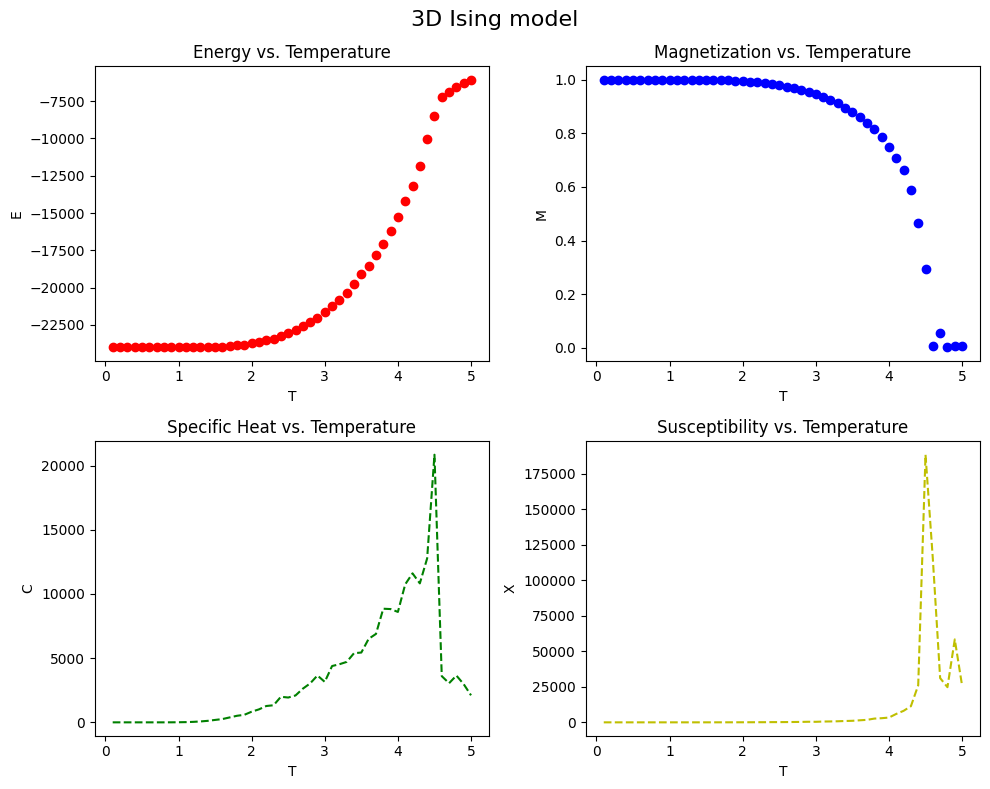

In [2]:
# 3D Ising model
J = 1
h = 0
N = 20
M = 1000
n = 500

T_list = np.linspace(0.1, 5, 15)
E_list = np.zeros(len(T_list))
M_list = np.zeros(len(T_list))
C_list = np.zeros(len(T_list))
X_list = np.zeros(len(T_list))

for i in range(len(T_list)):
    E_list[i], M_list[i], C_list[i], X_list[i] = ising3D(J, h, T_list[i], N, M, n)

# save data to txt file
np.savetxt('T_list3D.txt', T_list)
np.savetxt('E_list3D.txt', E_list)
np.savetxt('M_list3D.txt', M_list)
np.savetxt('C_list3D.txt', C_list)
np.savetxt('X_list3D.txt', X_list)

######################################################################################################

# read data from txt file
T_list = np.loadtxt('./data/3D_demo/T_list3D.txt')
E_list = np.loadtxt('./data/3D_demo/E_list3D.txt')
M_list = np.loadtxt('./data/3D_demo/M_list3D.txt')
C_list = np.loadtxt('./data/3D_demo/C_list3D.txt')
X_list = np.loadtxt('./data/3D_demo/X_list3D.txt')


# for i in range(31, 32):
#     E_list[i], M_list[i], C_list[i], X_list[i] = ising3D(J, h, T_list[i], N, M, n)


# plot
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('3D Ising model', fontsize=16)

ax1.set_title('Energy vs. Temperature')
ax1.set_xlabel('T')
ax1.set_ylabel('E')
# ax1.plot(T_list, E_list, 'r--')
ax1.scatter(T_list, E_list, c='r')

ax2.set_title('Magnetization vs. Temperature')
ax2.set_xlabel('T')
ax2.set_ylabel('M')
# ax2.plot(T_list, abs(M_list) / N**3, 'b--')
ax2.scatter(T_list, abs(M_list) / N**3, c='b')

ax3.set_title('Specific Heat vs. Temperature')
ax3.set_xlabel('T')
ax3.set_ylabel('C')
ax3.plot(T_list, C_list, 'g--')

ax4.set_title('Susceptibility vs. Temperature')
ax4.set_xlabel('T')
ax4.set_ylabel('X')
ax4.plot(T_list, X_list, 'y--')

plt.tight_layout()
plt.show()


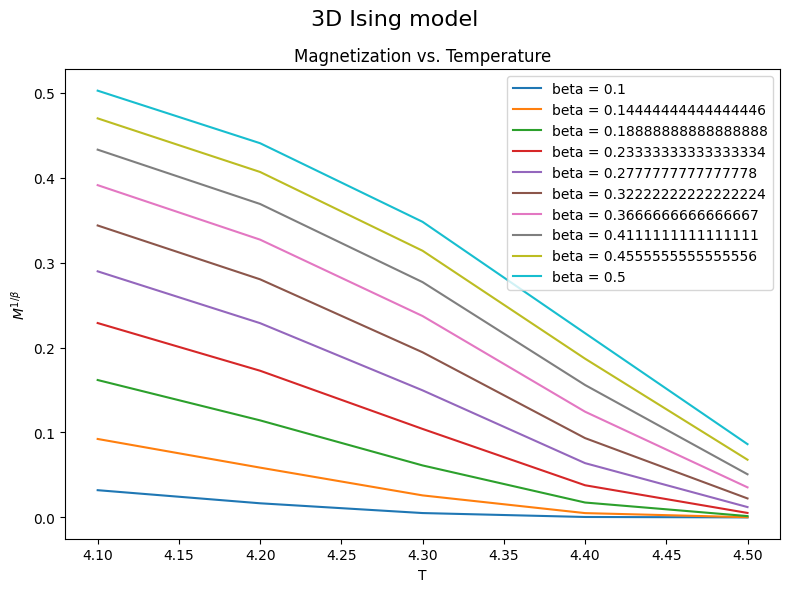

In [3]:
# beta fitting
import scipy.optimize as opt


T_list = np.loadtxt('./data/3D_demo/T_list3D.txt')
M_list = np.loadtxt('./data/3D_demo/M_list3D.txt')


fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('3D Ising model', fontsize=16)

ax.set_title('Magnetization vs. Temperature')
ax.set_xlabel('T')
ax.set_ylabel('$M^{1/\\beta}$')

begin = 40
end = 45
T_list = T_list[begin:end]
M_list = abs(M_list[begin:end]) / N**3

for beta in np.linspace(0.1, 0.5, 10):
    ax.plot(T_list, M_list ** (1/beta), label='beta = ' + str(beta))

ax.legend()

plt.tight_layout()
plt.show()


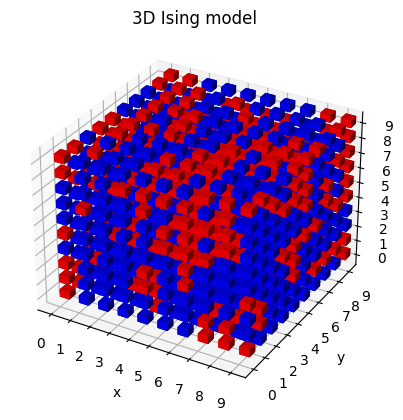

In [4]:
from matplotlib.animation import FuncAnimation


# 3D Ising model, spin animation
J = 1
h = 0
N = 10
M = 100

T = 4.5

# initialize
spins = np.random.choice([-1, 1], size=(N, N, N))  # random spin initialization

E = -J * (np.sum(spins * np.roll(spins, 1, axis=0))     # interaction energy with up/down neighbors (periodic boundary condition)
          + np.sum(spins * np.roll(spins, 1, axis=1))   # interaction energy with left/right neighbors (periodic boundary condition)
          + np.sum(spins * np.roll(spins, 1, axis=2))   # interaction energy with front/back neighbors (periodic boundary condition)
          ) - h * np.sum(spins)  # external field energy


# animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_title('3D Ising model')
ax.set_aspect('equal')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-0.5, N-0.5)
ax.set_ylim(-0.5, N-0.5)
ax.set_zlim(-0.5, N-0.5)

ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))
ax.set_zticks(np.arange(0, N, 1))


def voxel_plot(ax, spins: np.ndarray):
    # x, y, z = np.indices(spins.shape)
    # x = x.flatten()
    # y = y.flatten()
    # z = z.flatten()

    # dx = 0.25 * np.ones_like(x)
    # dy = dx.copy()
    # dz = dx.copy()

    # ax.bar3d(x, y, z, dx, dy, dz, color='b', zsort='average')

    for i in range(N):
        for j in range(N):
            for k in range(N):
                if spins[i, j, k] == 1:
                    ax.bar3d(i, j, k, 0.5, 0.5, 0.5, color='b', zsort='average')
                else:
                    ax.bar3d(i, j, k, 0.5, 0.5, 0.5, color='r', zsort='average')

    return ax


def update(i):
    # Monte Carlo
    for j in range(N**3):
        # randomly choose a spin
        x = np.random.randint(0, N)
        y = np.random.randint(0, N)
        z = np.random.randint(0, N)

        # calculate energy difference
        delta_E = J * 2*spins[x, y, z] * (spins[(x+1) % N, y, z] + spins[(x-1) % N, y, z] + spins[x, (y+1) % N, z] + spins[x, (y-1) % N, z] + spins[x, y, (z+1) % N] + spins[x, y, (z-1) % N]) + \
            h * 2*spins[x, y, z]  # mod N is periodic boundary condition, 2*spins[x, y, z] is the energy of the spin itself

        # Metropolis flip algorithm
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins[x, y, z] *= -1

    # plot
    ax.clear()
    ax.set_title('3D Ising model')
    ax.set_aspect('equal')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(-0.5, N-0.5)
    ax.set_ylim(-0.5, N-0.5)
    ax.set_zlim(-0.5, N-0.5)

    ax.set_xticks(np.arange(0, N, 1))
    ax.set_yticks(np.arange(0, N, 1))
    ax.set_zticks(np.arange(0, N, 1))

    voxel_plot(ax, spins)
    return ax


anim = FuncAnimation(fig, update, frames=M, interval=200, repeat=False)
anim.save('3D_Ising_model.gif', writer='pillow', fps=10)
